In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os

# Set up CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the path where the dataset will be stored
data_path = '../../datasets'

# Ensure the directory exists
os.makedirs(data_path, exist_ok=True)

# Check if the dataset is already downloaded
download = not os.path.exists(os.path.join(data_path, 'MNIST'))

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root=data_path, train=True, download=download, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet().to(device)

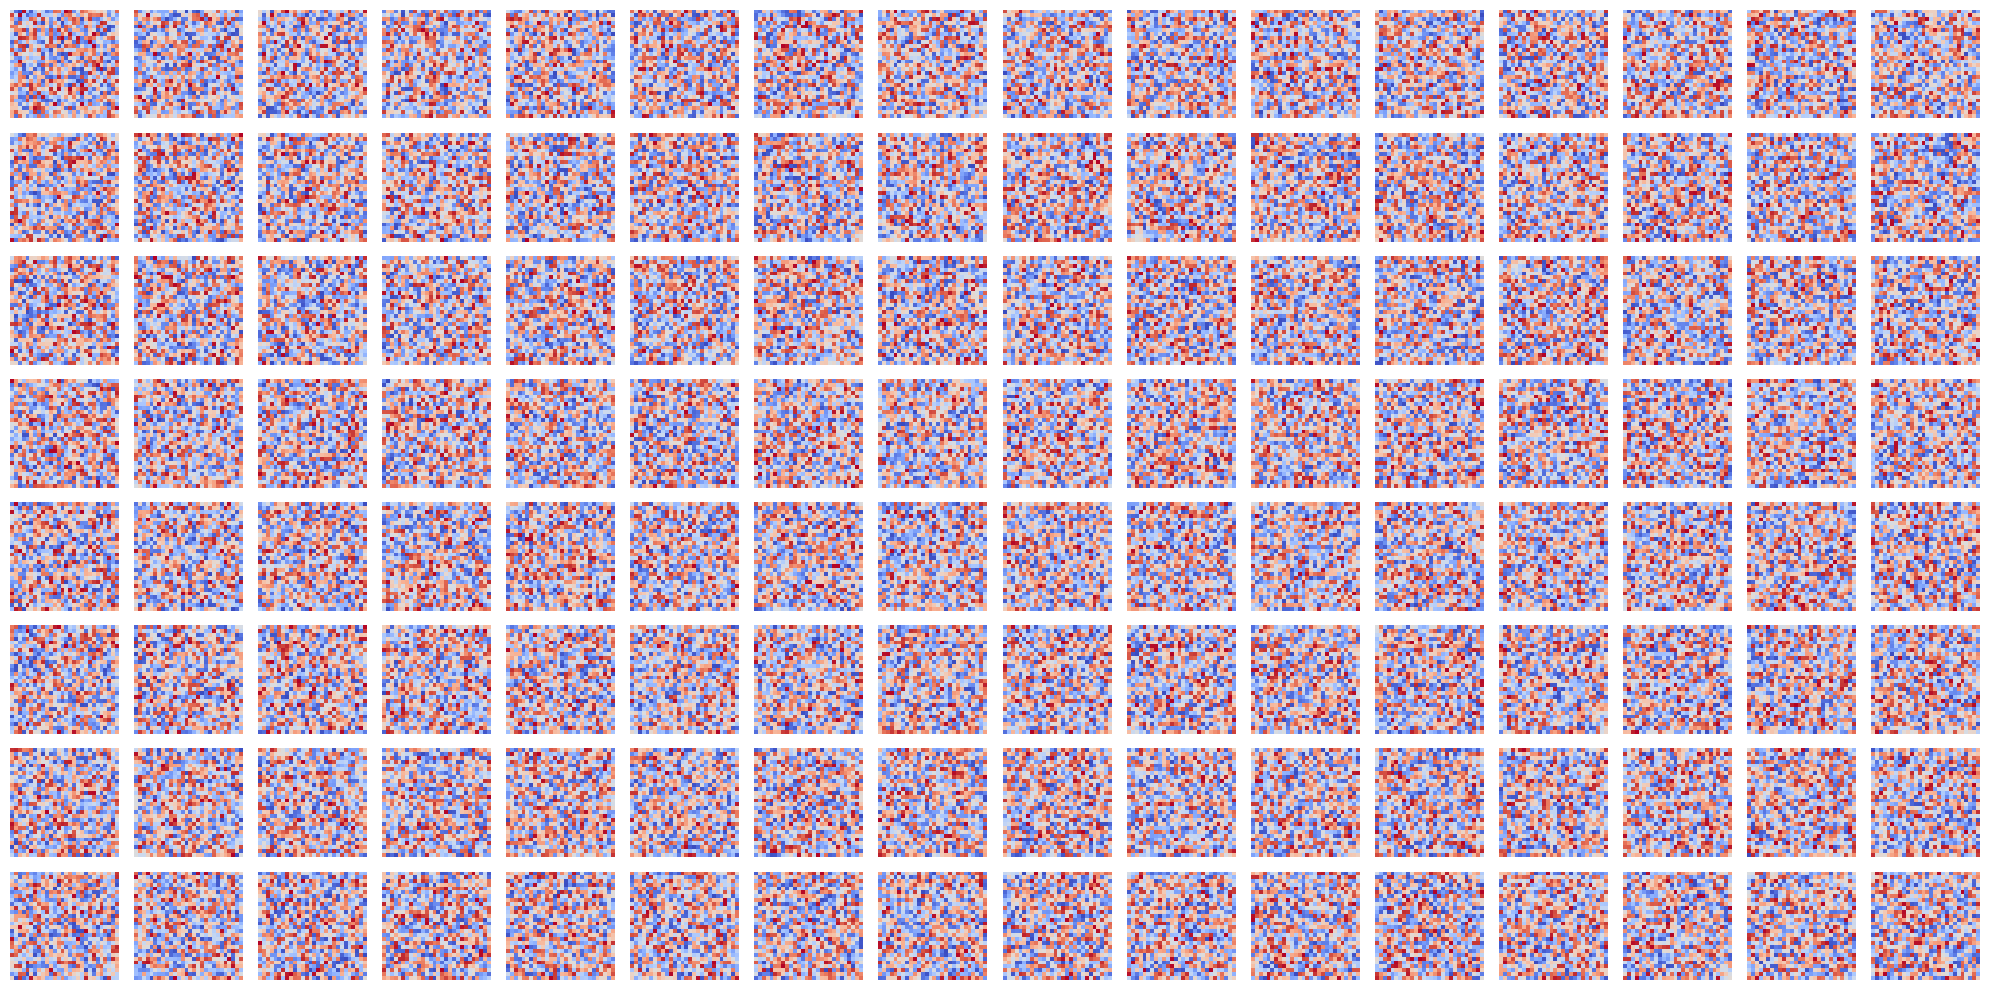

In [ ]:
# visualize weights when the model is initialized with random weights
def visualize_weights(model):
    weights = model.fc1.weight.data.cpu().numpy()
    fig, axes = plt.subplots(8, 16, figsize=(20, 10))
    axes = axes.ravel()
    
    for i in range(128):
        weight = weights[i].reshape(28, 28)
        axes[i].imshow(weight, cmap='coolwarm')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    

visualize_weights(model)

In [ ]:
def train(model, train_loader, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = nn.functional.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                print(f'Epoch {epoch}: [{batch_idx * len(data)}/{len(train_loader.dataset)}]\tLoss: {loss.item():.6f}')

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
train(model, train_loader, optimizer, epochs=5)

Epoch 0: [0/60000]	Loss: 2.383715
Epoch 0: [6400/60000]	Loss: 0.560444
Epoch 0: [12800/60000]	Loss: 0.312157
Epoch 0: [19200/60000]	Loss: 0.535397
Epoch 0: [25600/60000]	Loss: 0.319310
Epoch 0: [32000/60000]	Loss: 0.225178
Epoch 0: [38400/60000]	Loss: 0.182373
Epoch 0: [44800/60000]	Loss: 0.200629
Epoch 0: [51200/60000]	Loss: 0.482780
Epoch 0: [57600/60000]	Loss: 0.316082
Epoch 1: [0/60000]	Loss: 0.231682
Epoch 1: [6400/60000]	Loss: 0.293009
Epoch 1: [12800/60000]	Loss: 0.134679
Epoch 1: [19200/60000]	Loss: 0.273882
Epoch 1: [25600/60000]	Loss: 0.354445
Epoch 1: [32000/60000]	Loss: 0.261678
Epoch 1: [38400/60000]	Loss: 0.214135
Epoch 1: [44800/60000]	Loss: 0.136916
Epoch 1: [51200/60000]	Loss: 0.104669
Epoch 1: [57600/60000]	Loss: 0.116320
Epoch 2: [0/60000]	Loss: 0.141704
Epoch 2: [6400/60000]	Loss: 0.288073
Epoch 2: [12800/60000]	Loss: 0.207070
Epoch 2: [19200/60000]	Loss: 0.187859
Epoch 2: [25600/60000]	Loss: 0.080941
Epoch 2: [32000/60000]	Loss: 0.159162
Epoch 2: [38400/60000]	Loss

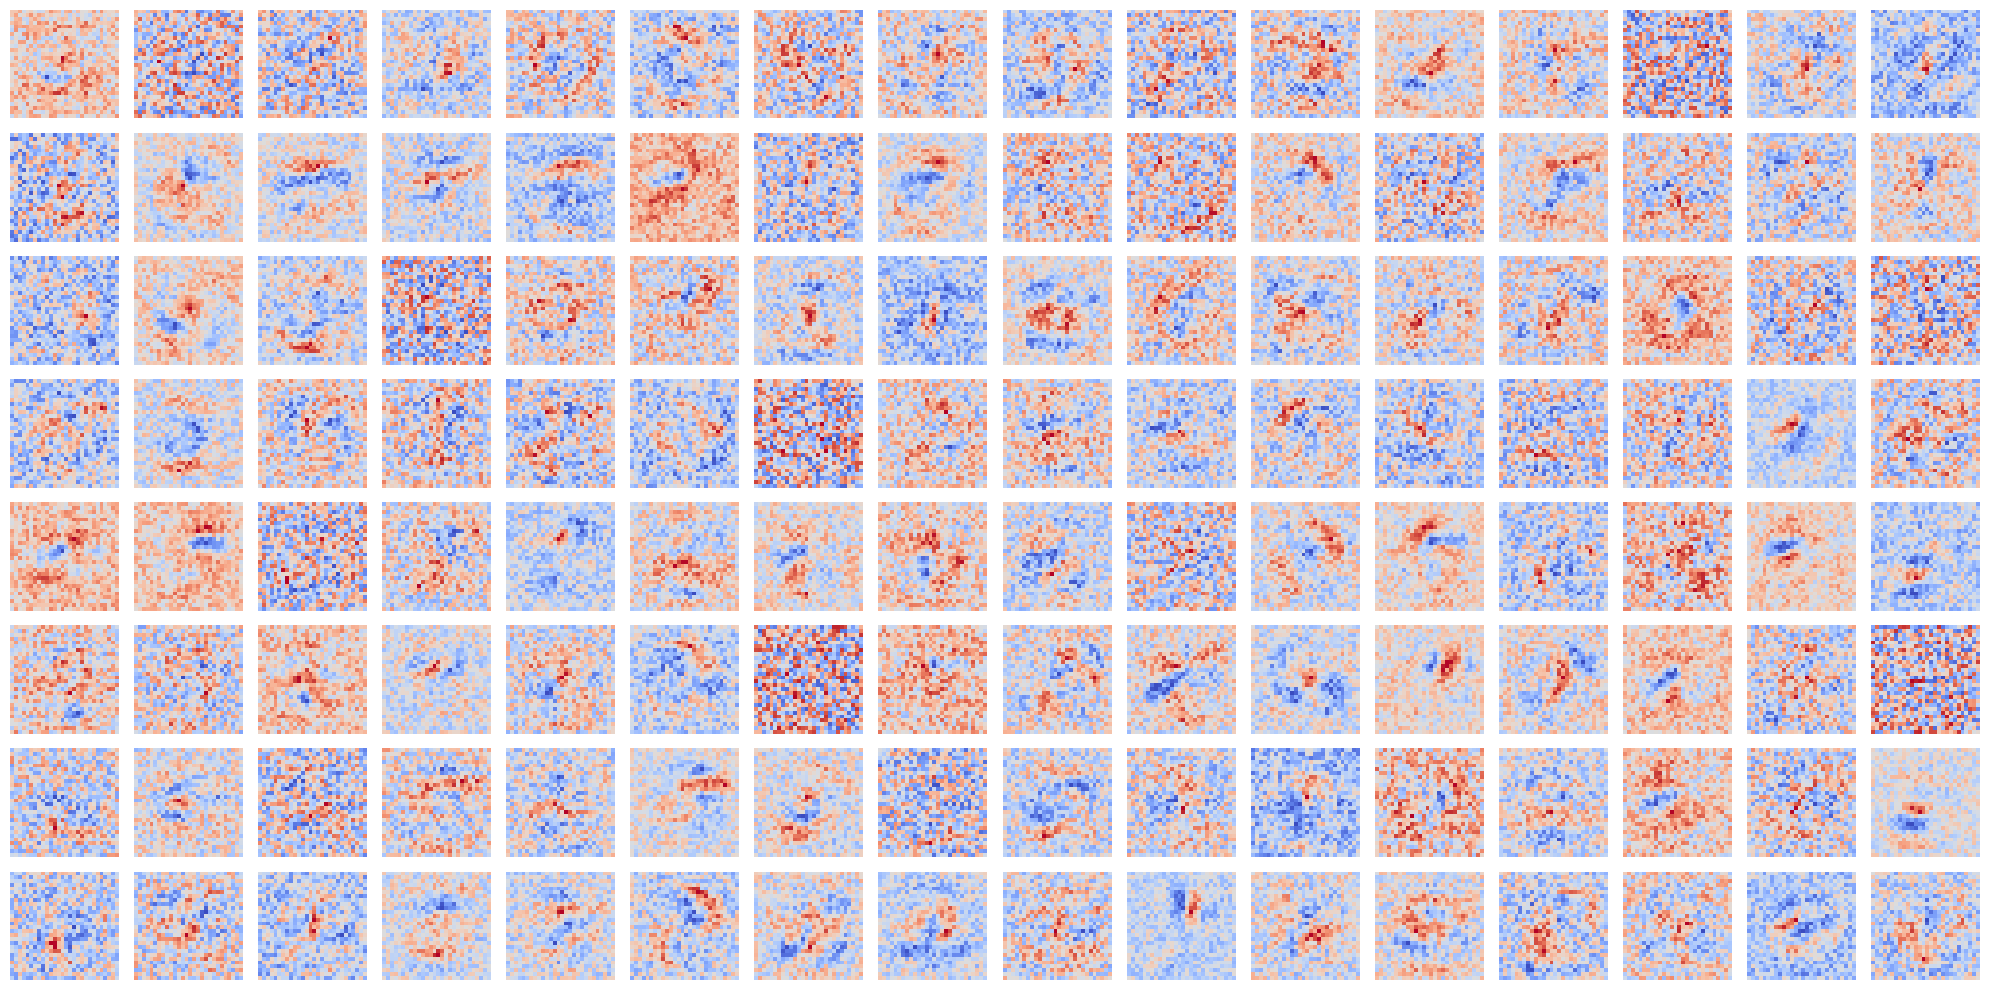

In [ ]:
def visualize_weights(model):
    weights = model.fc1.weight.data.cpu().numpy()
    fig, axes = plt.subplots(8, 16, figsize=(20, 10))
    axes = axes.ravel()
    
    for i in range(128):
        weight = weights[i].reshape(28, 28)
        axes[i].imshow(weight, cmap='coolwarm')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_weights(model)

visualize layer 2 of the neural network


In [ ]:
def visualize_weights(model):
    weights = model.fc2.weight.data.cpu().numpy()
    fig, axes = plt.subplots(8, 16, figsize=(20, 10))
    axes = axes.ravel()
    
    for i in range(128):
        weight = weights[i].reshape(28, 28)
        axes[i].imshow(weight, cmap='coolwarm')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_weights(model)

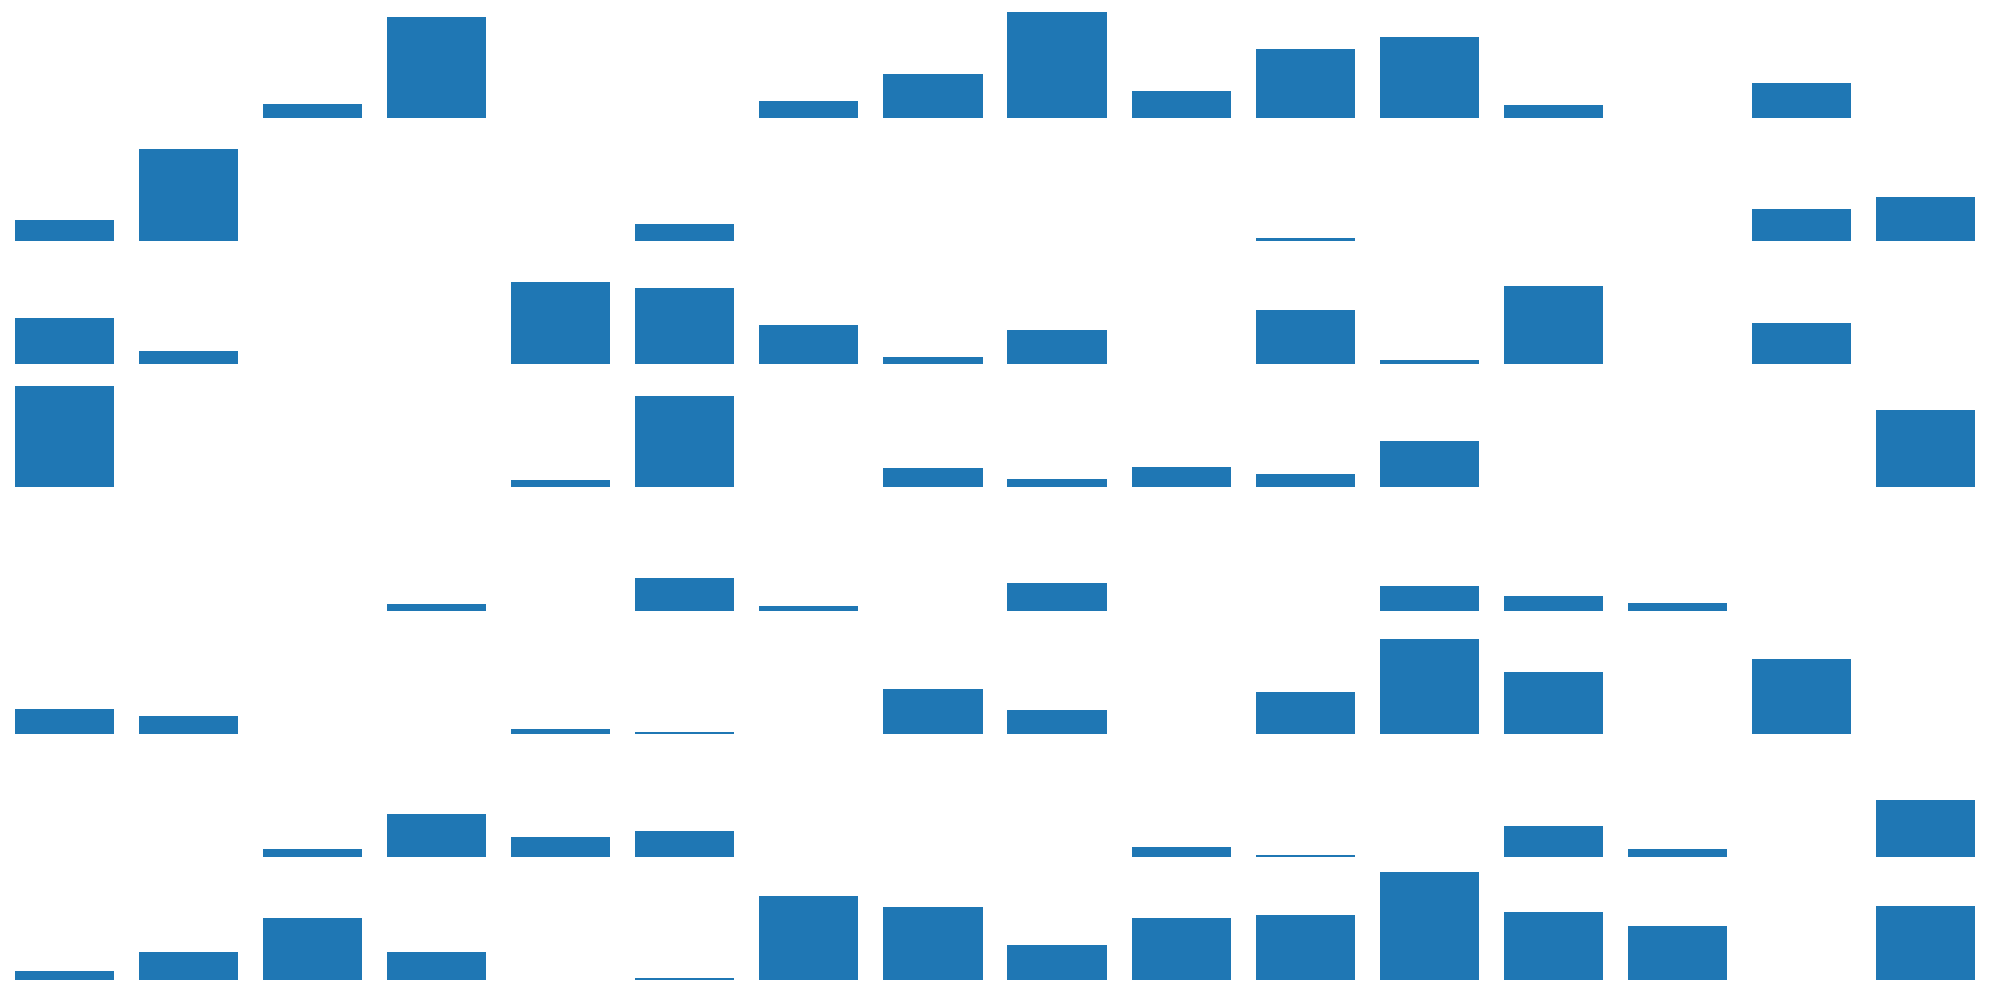

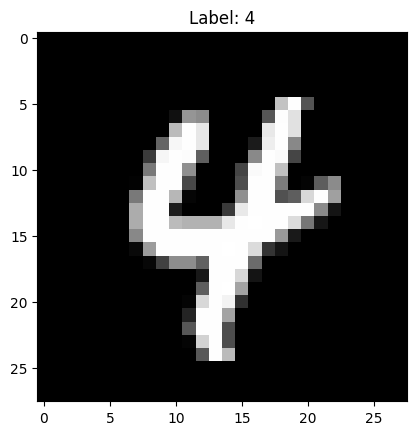

In [7]:
def visualize_activations(model, image):
    model.eval()
    with torch.no_grad():
        image = image.unsqueeze(0).to(device)
        activations = torch.relu(model.fc1(image.view(-1, 28*28)))
        activations = activations.cpu().numpy()[0]

    fig, axes = plt.subplots(8, 16, figsize=(20, 10))
    axes = axes.ravel()
    
    for i in range(128):
        axes[i].bar([''], [activations[i]])
        axes[i].set_ylim(0, max(activations))
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Get a single image
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='./data', train=False, download=True, transform=transform),
    batch_size=1, shuffle=True)

# Visualize activations for a single image
dataiter = iter(test_loader)
images, labels = next(dataiter)
visualize_activations(model, images[0])

# Display the image
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f'Label: {labels.item()}')
plt.show()

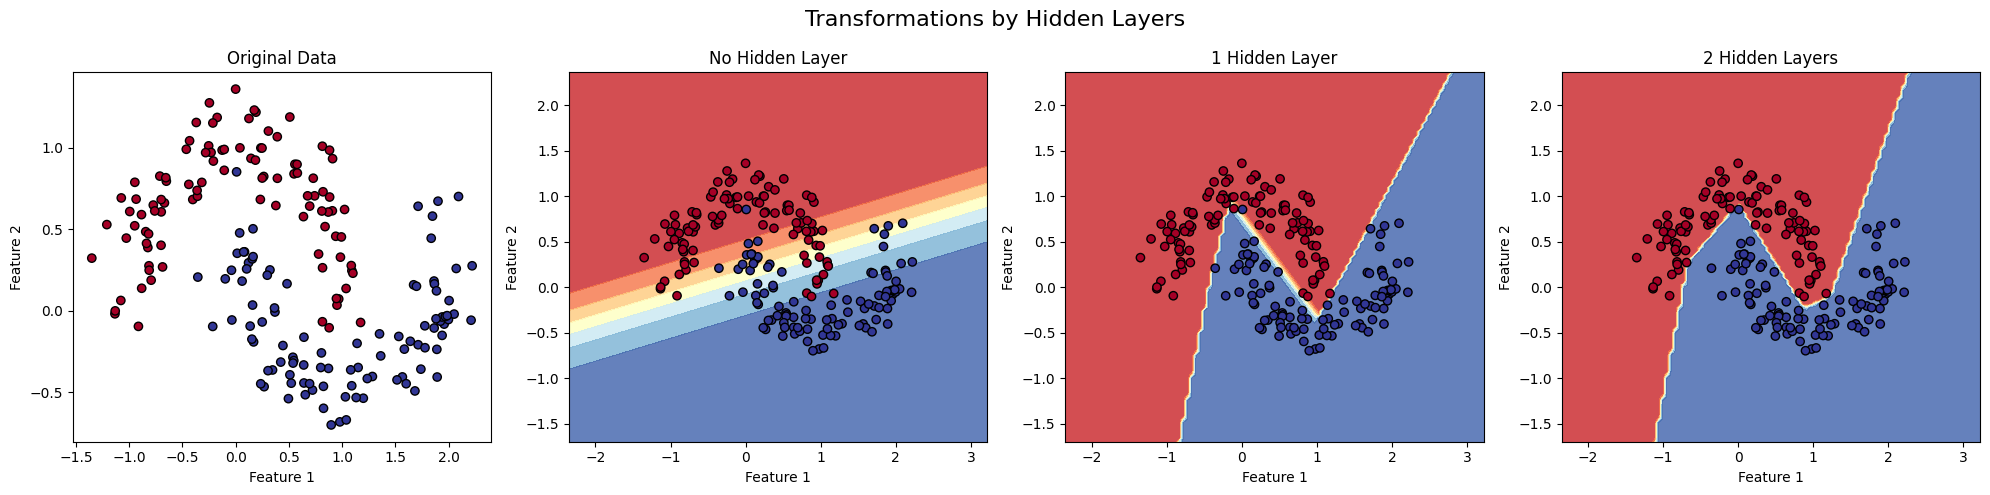

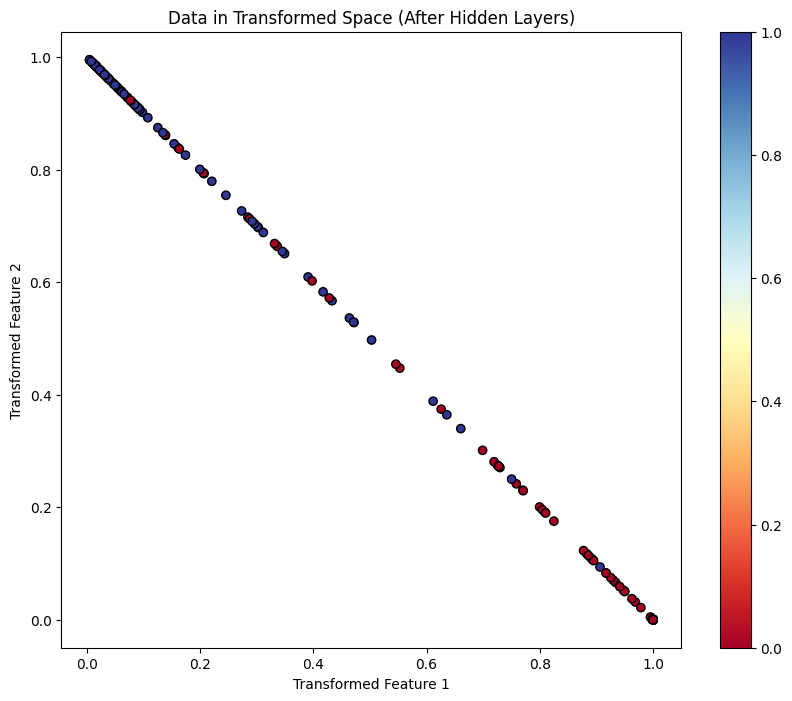

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

# Create models with different numbers of hidden layers
models = [
    ("No Hidden Layer", MLPClassifier(hidden_layer_sizes=(), activation='identity', solver='lbfgs', max_iter=1000)),
    ("1 Hidden Layer", MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='lbfgs', max_iter=1000)),
    ("2 Hidden Layers", MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='lbfgs', max_iter=1000))
]

# Set up the plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Transformations by Hidden Layers", fontsize=16)

# Plot the original data
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="black")
axes[0].set_title("Original Data")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Train models and plot decision boundaries
for i, (name, model) in enumerate(models):
    model.fit(X, y)
    
    DisFun = DecisionBoundaryDisplay.from_estimator(
        model, X, cmap=plt.cm.RdYlBu, alpha=0.8, ax=axes[i+1]
    )
    axes[i+1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="black")
    axes[i+1].set_title(name)
    axes[i+1].set_xlabel("Feature 1")
    axes[i+1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Visualize the transformed space for the 2-hidden-layer model
model = MLPClassifier(hidden_layer_sizes=(10, 2), activation='relu', solver='lbfgs', max_iter=1000)
model.fit(X, y)

# Get the output of the second-to-last layer
last_hidden_layer = model.predict_proba(X)

# Plot the transformed space
plt.figure(figsize=(10, 8))
plt.scatter(last_hidden_layer[:, 0], last_hidden_layer[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor="black")
plt.title("Data in Transformed Space (After Hidden Layers)")
plt.xlabel("Transformed Feature 1")
plt.ylabel("Transformed Feature 2")
plt.colorbar()
plt.show()